In [1]:
import numpy as np
import pandas as pd

import geoplot as gplt
from urllib.request import urlopen
from zipfile import ZipFile
from io import StringIO
import shapefile

from shapely.geometry import shape  
import osr
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import os
import earthpy as et

In [2]:
pd.options.display.max_columns=50

In [3]:
df_skt_gender1804 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201804.CSV', sep='|')
df_skt_gender1805 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201805.CSV', sep='|')
df_skt_gender1806 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201806.CSV', sep='|')
df_skt_gender1807 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201807.CSV', sep='|')
df_skt_gender1808 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201808.CSV', sep='|')
df_skt_gender1809 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201809.CSV', sep='|')
df_skt_gender1810 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201810.CSV', sep='|')
df_skt_gender1811 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201811.CSV', sep='|')
df_skt_gender1812 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201812.CSV', sep='|')
df_skt_gender1901 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201901.CSV', sep='|')
df_skt_gender1902 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201902.CSV', sep='|')
df_skt_gender1903 = pd.read_csv('./data/innovation/skt/성연령유동/노원_종로_FLOW_AGE_201903.CSV', sep='|')

df_skt_time1804 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201804.CSV', sep='|')
df_skt_time1805 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201805.CSV', sep='|')
df_skt_time1806 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201806.CSV', sep='|')
df_skt_time1807 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201807.CSV', sep='|')
df_skt_time1808 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201808.CSV', sep='|')
df_skt_time1809 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201809.CSV', sep='|')
df_skt_time1810 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201810.CSV', sep='|')
df_skt_time1811 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201811.CSV', sep='|')
df_skt_time1812 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201812.CSV', sep='|')
df_skt_time1901 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201901.CSV', sep='|')
df_skt_time1902 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201902.CSV', sep='|')
df_skt_time1903 = pd.read_csv('./data/innovation/skt/시간대유동/노원_종로_FLOW_TIME_201903.CSV', sep='|')

In [4]:
print(df_skt_gender1804.shape,'\n',
df_skt_gender1805.shape,'\n',
df_skt_gender1806.shape,'\n',
df_skt_gender1807.shape,'\n',
df_skt_gender1808.shape,'\n',
df_skt_gender1809.shape,'\n',
df_skt_gender1810.shape,'\n',
df_skt_gender1811.shape,'\n',
df_skt_gender1812.shape,'\n',
df_skt_gender1901.shape,'\n',
df_skt_gender1902.shape,'\n',
df_skt_gender1903.shape,'\n',
'\n',
df_skt_time1804.shape,'\n',
df_skt_time1805.shape,'\n',
df_skt_time1806.shape,'\n',
df_skt_time1807.shape,'\n',
df_skt_time1808.shape,'\n',
df_skt_time1809.shape,'\n',
df_skt_time1810.shape,'\n',
df_skt_time1811.shape,'\n',
df_skt_time1812.shape,'\n',
df_skt_time1901.shape,'\n',
df_skt_time1902.shape,'\n',
df_skt_time1903.shape,'\n',
     )

(1080, 34) 
 (1116, 34) 
 (1080, 34) 
 (1116, 34) 
 (1116, 34) 
 (1080, 34) 
 (1116, 34) 
 (1080, 34) 
 (1116, 34) 
 (1116, 34) 
 (1008, 34) 
 (1116, 34) 
 
 (1080, 28) 
 (1116, 28) 
 (1080, 28) 
 (1116, 28) 
 (1116, 28) 
 (1080, 28) 
 (1116, 28) 
 (1080, 28) 
 (1116, 28) 
 (1116, 28) 
 (1008, 28) 
 (1116, 28) 



### pratice 4

In [5]:
seoul_file = './data/innovation/skt/행정동경계파일/종로_노원_행정동.shp'
seoul = gpd.read_file(seoul_file, encoding='euckr')
seoul.tail(3)

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
33,2019,1135069500,상계6.7동,11,서울특별시,11350,노원구,1434584.76,5869.69,127.0602780,37.6502780,"POLYGON ((961942.6390408924 1961314.366480526,..."
34,2019,1135070000,상계8동,11,서울특별시,11350,노원구,673099.73,3469.86,127.0536390,37.6639440,"POLYGON ((961079.5663839449 1962500.208763008,..."
35,2019,1135071000,상계9동,11,서울특별시,11350,노원구,753785.05,4392.37,127.0659170,37.6617500,"POLYGON ((962087.876863913 1963246.649231784, ..."


### 글꼴설정

In [6]:
import matplotlib.font_manager as fm
import matplotlib as mpl
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothicCoding


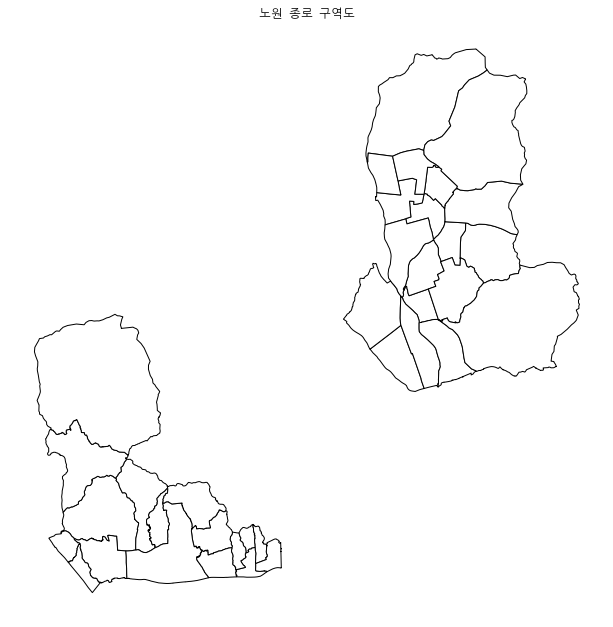

In [7]:
ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
ax.set_title("노원 종로 구역도")
ax.set_axis_off()
plt.show()

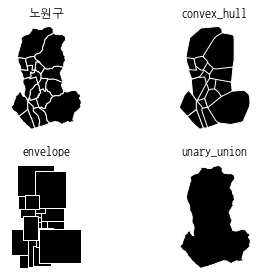

In [8]:
sample = seoul[seoul.SGNG_NM == "노원구"]

ax = plt.subplot(2, 2, 1)
sample.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("노원구")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4)
gpd.GeoSeries([sample.geometry.buffer(0.01).unary_union]
              ).plot(ax=ax, color="k", edgecolor='w')
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()

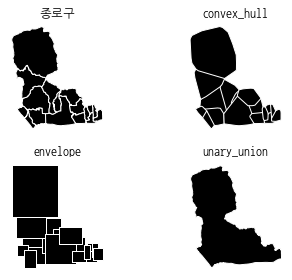

In [9]:
sample = seoul[seoul.SGNG_NM == "종로구"]

ax = plt.subplot(2, 2, 1)
sample.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("종로구")
ax.set_axis_off()

ax = plt.subplot(2, 2, 2)
sample.convex_hull.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("convex_hull")
ax.set_axis_off()

ax = plt.subplot(2, 2, 3)
sample.envelope.plot(color='k', edgecolor="w", ax=ax)
ax.set_title("envelope")
ax.set_axis_off()

ax = plt.subplot(2, 2, 4)
gpd.GeoSeries([sample.geometry.buffer(0.01).unary_union]
              ).plot(ax=ax, color="k", edgecolor='w')
ax.set_title("unary_union")
ax.set_axis_off()

plt.tight_layout()
plt.show()

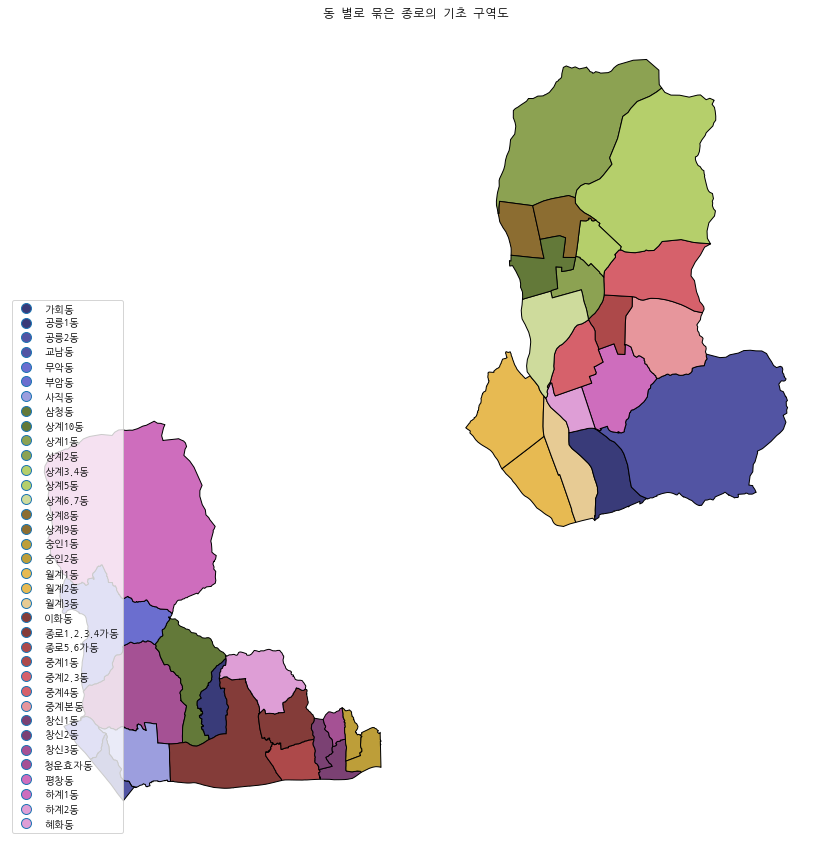

In [10]:
seoul.geometry = seoul.buffer(0.001)
seoul = seoul.dissolve(by='HDONG_CD')
ax = seoul.plot(figsize=(15, 15), column="HDONG_NM", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("동 별로 묶은 종로의 기초 구역도")
ax.set_axis_off()
plt.show()

In [11]:
result = seoul.merge(df_skt_gender1901,on='HDONG_NM',how='left')

In [12]:
result = result.set_index("HDONG_CD")

In [13]:
result.head()

,geometry,STD_YYYY,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,STD_YM,STD_YMD,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_0004,WMAN_FLOW_POP_CNT_0509,WMAN_FLOW_POP_CNT_1014,WMAN_FLOW_POP_CNT_1519,WMAN_FLOW_POP_CNT_2024,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
HDONG_CD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190101,0.00,111.46,503.04,812.26,1156.68,1712.90,1965.17,2032.93,2060.85,2689.66,2586.93,2322.38,1848.36,1183.10,1096.99,0.00,136.19,471.96,741.02,1254.68,1513.98,1429.91,1733.11,1681.55,2013.55,1617.53,1443.45,1067.40,432.95,555.90
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190102,3.10,68.20,330.52,992.02,2336.05,2407.09,2526.18,2829.57,2868.22,3654.95,3238.21,3027.05,2529.66,1494.49,1610.33,0.23,131.90,326.99,1120.57,2924.49,1904.84,1773.81,2002.58,1889.23,2154.18,1710.36,1551.09,1212.21,649.97,899.18
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190103,0.07,55.61,383.98,834.00,1612.53,2598.81,2272.44,2876.05,2798.49,3665.83,3397.68,3282.40,2791.74,2004.33,2054.42,0.00,57.47,300.76,716.80,2686.86,2032.35,1780.89,1946.15,2101.11,2250.39,1932.01,1792.44,1428.24,784.69,1052.97
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190104,0.86,36.64,330.55,741.46,1635.84,2626.94,2384.51,2897.77,2686.27,3471.60,3389.70,3169.07,2874.82,1990.91,1988.60,0.00,87.75,334.17,706.34,2670.85,1918.41,1696.08,2024.32,2054.79,2302.25,1853.44,1652.19,1286.71,798.45,1089.94
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190105,0.00,64.27,409.95,806.81,1191.35,1929.40,2184.44,2366.40,2344.26,2845.19,3000.08,2937.25,2625.28,1831.89,1679.40,0.00,67.23,440.71,629.70,1398.60,1907.65,1830.17,1937.06,1989.58,2126.36,1856.51,1596.88,1363.25,749.03,919.48


### temp

In [14]:
result['x']=result['X_COORD']
result['y']=result['Y_COORD']

In [15]:
result.head()

,geometry,STD_YYYY,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,STD_YM,STD_YMD,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,MAN_FLOW_POP_CNT_2024,MAN_FLOW_POP_CNT_2529,MAN_FLOW_POP_CNT_3034,MAN_FLOW_POP_CNT_3539,MAN_FLOW_POP_CNT_4044,MAN_FLOW_POP_CNT_4549,MAN_FLOW_POP_CNT_5054,MAN_FLOW_POP_CNT_5559,MAN_FLOW_POP_CNT_6064,MAN_FLOW_POP_CNT_6569,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_0004,WMAN_FLOW_POP_CNT_0509,WMAN_FLOW_POP_CNT_1014,WMAN_FLOW_POP_CNT_1519,WMAN_FLOW_POP_CNT_2024,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U,x,y
HDONG_CD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190101,0.00,111.46,503.04,812.26,1156.68,1712.90,1965.17,2032.93,2060.85,2689.66,2586.93,2322.38,1848.36,1183.10,1096.99,0.00,136.19,471.96,741.02,1254.68,1513.98,1429.91,1733.11,1681.55,2013.55,1617.53,1443.45,1067.40,432.95,555.90,126.9726940,37.5813060
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190102,3.10,68.20,330.52,992.02,2336.05,2407.09,2526.18,2829.57,2868.22,3654.95,3238.21,3027.05,2529.66,1494.49,1610.33,0.23,131.90,326.99,1120.57,2924.49,1904.84,1773.81,2002.58,1889.23,2154.18,1710.36,1551.09,1212.21,649.97,899.18,126.9726940,37.5813060
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190103,0.07,55.61,383.98,834.00,1612.53,2598.81,2272.44,2876.05,2798.49,3665.83,3397.68,3282.40,2791.74,2004.33,2054.42,0.00,57.47,300.76,716.80,2686.86,2032.35,1780.89,1946.15,2101.11,2250.39,1932.01,1792.44,1428.24,784.69,1052.97,126.9726940,37.5813060
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190104,0.86,36.64,330.55,741.46,1635.84,2626.94,2384.51,2897.77,2686.27,3471.60,3389.70,3169.07,2874.82,1990.91,1988.60,0.00,87.75,334.17,706.34,2670.85,1918.41,1696.08,2024.32,2054.79,2302.25,1853.44,1652.19,1286.71,798.45,1089.94,126.9726940,37.5813060
1111051500,"POLYGON ((954129.8679666672 1953798.669135527,...",2019,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,201901,20190105,0.00,64.27,409.95,806.81,1191.35,1929.40,2184.44,2366.40,2344.26,2845.19,3000.08,2937.25,2625.28,1831.89,1679.40,0.00,67.23,440.71,629.70,1398.60,1907.65,1830.17,1937.06,1989.58,2126.36,1856.51,1596.88,1363.25,749.03,919.48,126.9726940,37.5813060


In [16]:
type(result.geometry.iloc[0])

shapely.geometry.polygon.Polygon

In [143]:
# base = gplt.polyplot(seoul,
#                      linewidth=0.5,
#                      figsize=(12, 12)
#                     )
# gplt.polyplot(result,
# #                scale='POP_2010',
# #                limits=(1, 80),
# #                hue='POP_2010',
# #                cmap='Blues',
# #                k=5,
# #                linewidth=0.5,
# #                edgecolor='black',
# #                legend=True,
# #                legend_var='scale',
# #                legend_values=[8000000, 6000000, 4000000, 2000000, 100000],
# #                legend_labels=['8 million', '6 million', '4 million',
# #                               '2 million', '100 thousand'],
# #                legend_kwargs={'loc': 'lower right'},
# #                ax=base
#               )
# # ax.set_ylim((-1597757, 1457718))
# plt.title("1901성이동")
# plt.show()


# 지도위에 인구 플랏찍고싶은데 잘안됨 ㅜ